In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

tf.__version__

'2.9.1'

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_img.shape

(60000, 28, 28)

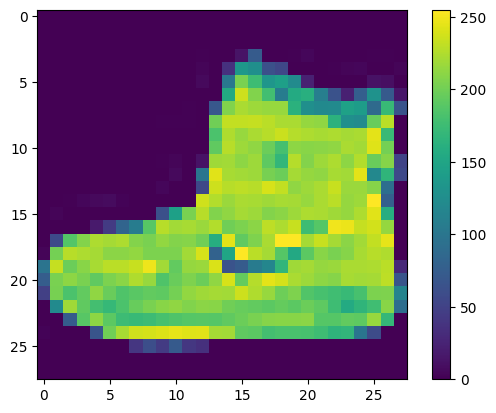

In [4]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_img / 255.0

test_images = test_img / 255.0

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

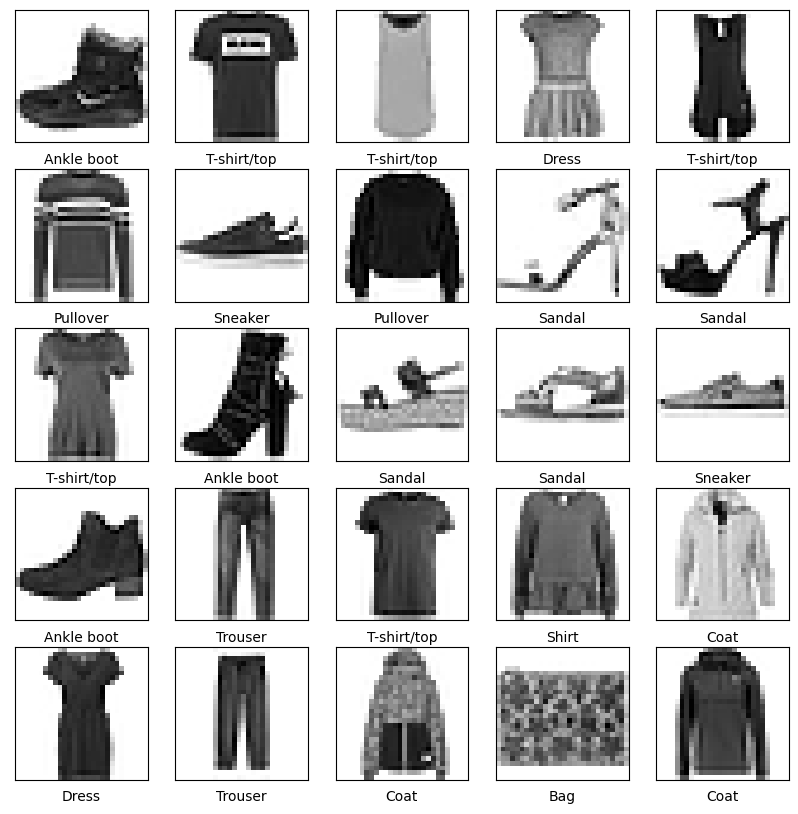

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)

2022-08-17 06:07:27.092425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-17 06:07:27.142974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-17 06:07:27.143289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-17 06:07:27.144362: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [10]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [17]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2308 - accuracy: 0.9132
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2238 - accuracy: 0.9155
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9175
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2097 - accuracy: 0.9217
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2022 - accuracy: 0.9229
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1975 - accuracy: 0.9249
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1921 - accuracy: 0.9280
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1866 - accuracy: 0.9301
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1828 - accuracy: 0.9313
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.176

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3978 - accuracy: 0.8910 - 748ms/epoch - 2ms/step

Test accuracy: 0.890999972820282


In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model(test_images)

In [15]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

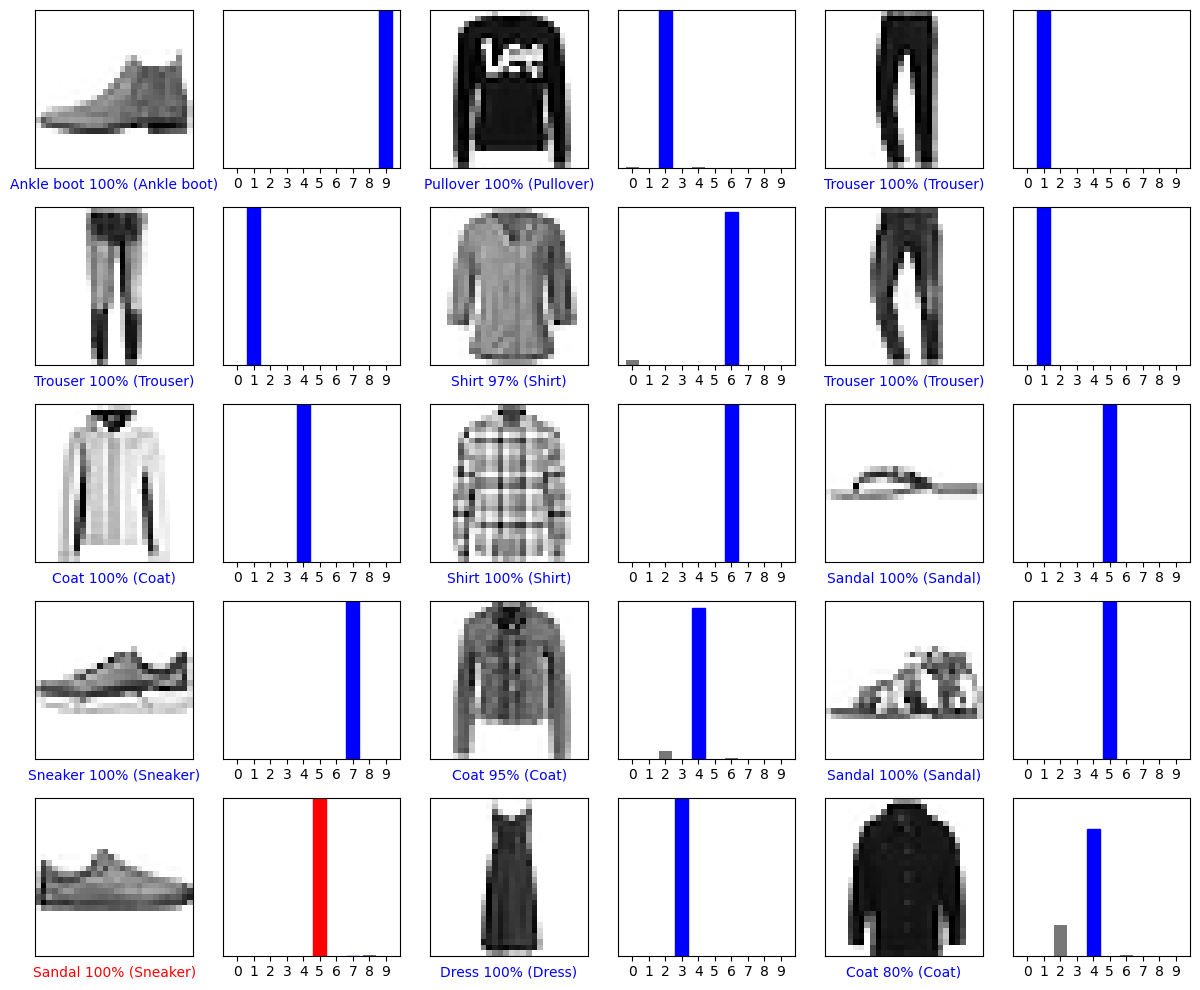

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [23]:
predictions_single = probability_model.predict(img)

predictions_single

1/1 [==============================] - 0s 81ms/step


array([[1.0600488e-03, 9.0395570e-20, 9.9662042e-01, 1.8972459e-09,
        2.3189182e-03, 5.0960013e-19, 6.1423361e-07, 0.0000000e+00,
        6.7063795e-15, 3.6386265e-28]], dtype=float32)

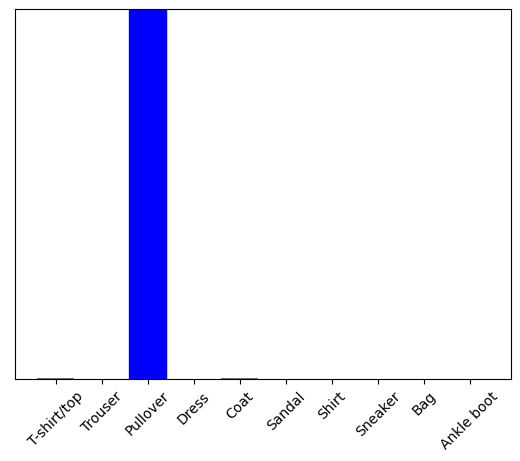

In [24]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()